In [1]:
import matplotlib.pyplot as plt

import Framework.Confounder_Injection as CI
import Framework.Models as Models
import importlib
importlib.reload(Models)
importlib.reload(CI)
import torch
import pandas as pd
import numpy as np
import seaborn as sbs
import matplotlib.pyplot as plt


# Validation with br_net data

The synthetic data closely resembles real world data. Information of classes does overlap (classes share the same space on the picture). Since confounder and real features do not overlap it might be easier to learn the confounders compared to the real world.

In [6]:
params = [
    [[1, 4], [3, 6], [5,8]], # real feature
    [[10, 12], [20, 22], [30,32]] # confounder
]

In [5]:
batch_size = 64

## Theoretical upper bound

If the network learns only the confounder we can define an upper bound for the accuracy. Let + be the event where the model determines the correct class and - the event where the model fails. c is the event in which an image is confounded. By the law of total probability it holds that:
$$
P(+) = P(+|c) * P(c) + P(+|\neg{c}) * P(\neg{c})
$$

Since $P(\neg{c}) = 1- P(c)$ it further holds that:
$$
P(+|c) * P(c) + P(+|\neg{c}) * P(\neg{c}) = P(+|c) * P(c) + P(+|\neg{c}) * (1 - P(c))
$$
Because the network only learns the confounder, there is a $ \frac{1}{k} $ chance for guessing the outcome if no confounder is in the test data for k classes. If the confounder is seperable the network has a probability of 1 for determining the correct class if a confounder is in the image. Therefore:
$$
P(+|\neg{c}) = \frac{1}{k}, P(+|c) = 1
$$
Putting these in (2) results in:
$$
1 * P(c) + \frac{1}{k} * (1 - P(c))
$$
Therefore if the network learns only the confounder and the confounder is seperable an upper bound, depending on $P(c)$, for k classes exists.

In [9]:
c = CI.confounder()
model = Models.SimpleConv()
c.generate_data(mode="br-net", samples=512, train_confounding=1, test_confounding=np.arange(0, 1.01, 0.2), params=params)
c.train(model=model, epochs=10, batch_size=batch_size, optimizer=torch.optim.Adam, hyper_params={'lr':0.001, "weight_decay": 0})

,confounder_strength,model_name,epoch,classification_accuracy,confounder_accuracy
0,0.0,SimpleConv,1,0.500000,NaN
1,0.2,SimpleConv,1,0.599609,1.0
2,0.4,SimpleConv,1,0.699219,1.0
3,0.6,SimpleConv,1,0.799805,1.0
4,0.8,SimpleConv,1,0.899414,1.0
5,1.0,SimpleConv,1,1.000000,1.0
6,0.0,SimpleConv,2,0.500000,NaN
7,0.2,SimpleConv,2,0.599609,1.0
8,0.4,SimpleConv,2,0.699219,1.0
9,0.6,SimpleConv,2,0.799805,1.0


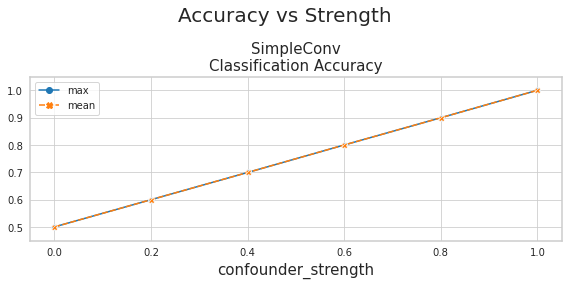

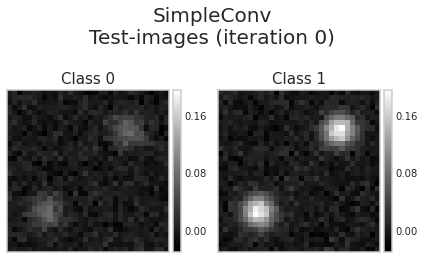

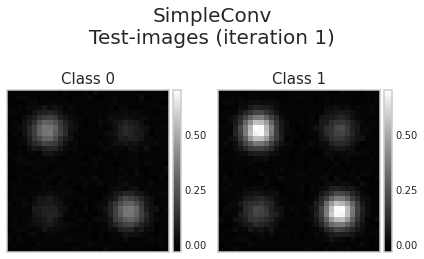

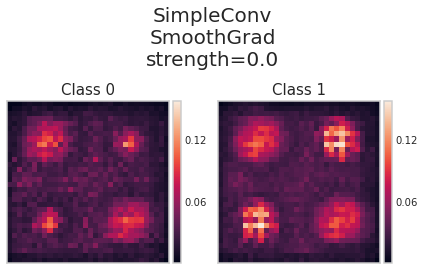

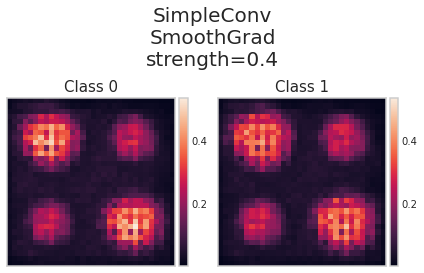

In [11]:
c.plot(accuracy_vs_strength=True, smoothgrad=True, saliency_iteration=[0,2], test_images=True, test_image_iteration=[0,1])